# Tables - Fake Covid-19 dataset

## Tweets Visualization

We've used the following packages to create a table showing the tweets and the relative tweets links:

In [ ]:
import itertools
import pandas as pd
import json
from dateutil.parser import parse
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import dash_table
import re
from jupyter_dash import JupyterDash
import requests
from bs4 import BeautifulSoup
import datetime
from dateutil.parser import parse
from urllib.parse import urlparse
from collections import Counter
import csv
from IPython.core.display import Image, display

We've defined a function to remove URLs from the tweet's text:

In [ ]:
def remove_urls(text):
    result = re.sub(r"http\S+", "", text)
    return(result)

In order to do the classification of the tweets, we need to read the CSV file and the JSON file:

In [ ]:
csv_dataframe = pd.read_csv('dataset/FINAL_fakecovid_final_filtered_dataset_clean.csv',sep=";")
csv_dataframe['tweet_id'] = csv_dataframe['tweet_id'].astype(str)
csv_list = csv_dataframe.values.tolist()
lista_unica_csv=list(itertools.chain.from_iterable(csv_list))

data = []
with open('dataset/fakecovid_result_final_translated_full.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))

We're going to visualize Tweets and relative links in a table and we will classify them in two categories: "fake" and "partially false".

In [ ]:
index= 0

category = []
date = []
txt = []
link = []

for element in data:
    token_id = data[index]['id_str']                          
    indice_csv = lista_unica_csv.index(token_id)   
    value_cat =  lista_unica_csv[indice_csv+1].lower()
    if value_cat == "false":
        value_cat = "fake"
    category.append(value_cat.replace(" ", ""))
    
    token=data[index]['created_at']
    d = parse(token)
    d = d.strftime('%Y/%m/%d')
    date.append(d)
    
    txt.append(remove_urls(data[index]['full_text']))
    link.append("[http://twitter.com/anyuser/status/"+data[index]['id_str']+"](http://twitter.com/anyuser/status/"+data[index]['id_str']+")")
    index=index+1

We create the Pandas DataFrame and then we work on it in order to create the table:

In [ ]:
df = pd.DataFrame(
    {'Type': category,
    'Date': date,
    'Tweet': txt,
    'Link': link
    })

In order to create the table, we've used the Dash module, that allows to generate an interactive table.

In [ ]:
app = JupyterDash(__name__)
#https://dash.plotly.com/datatable/filtering
app.layout = html.Div([
    dash_table.DataTable(
        id='datatable-interactivity',
        columns=[
            {'name': 'Type', 'id': 'Type'},
            {'name': 'Date', 'id': 'Date'},
            {'name': 'Tweet', 'id': 'Tweet'},
            {'name': 'Link', 'id':'Link', 'type': 'text', 'presentation':'markdown'}],
        data=df.to_dict('records'),
        style_filter={
            "backgroundColor":"white"
        },
        style_data_conditional=[
        {
            'if': {
                'column_id': 'Type',
            },
            'font-weight':'bold',
            'width':'200px'
        },
        {
            'if': {
                'column_id': 'Date',
            },
            'width':'200px'
        },
        {
            'if': {
                'column_id': 'Tweet',
            },
            'width':'2500px'
        },
        {
            'if': {
                'column_id': 'Link',
            },
            'font-size':'16px'
        }],
        style_cell={
            'textAlign':'left',
            'font-family': 'Helvetica Neue',
            'whiteSpace': 'normal',
            'padding-bottom': '15px',
            'border':'0px solid darkslategray',
            'font-size':'16px',
            'height': 'auto'
        },
        style_header={
            'backgroundColor':"#FBFBB8", #moccasin
            'font-family':'Helvetica Neue',
            'font-weight': 'bold',
            'whiteSpace': 'normal',
            'padding': '10px',
            'border-bottom':'1px solid darkslategray',
            'font-size':'18px',
            'height': 'auto'
        },
        style_data={
            'whiteSpace': 'normal',
            'height': 'auto'
        },
        filter_action="native",
        sort_action="native",
        sort_mode="multi",
        page_action="native",
        page_current= 0,
        page_size= 4,
        fill_width=False
    ),
    html.Div(id='datatable-interactivity-container')
])



#if __name__ == '__main__':
#    app.run_server(debug=False)
app.run_server()#mode='inline'


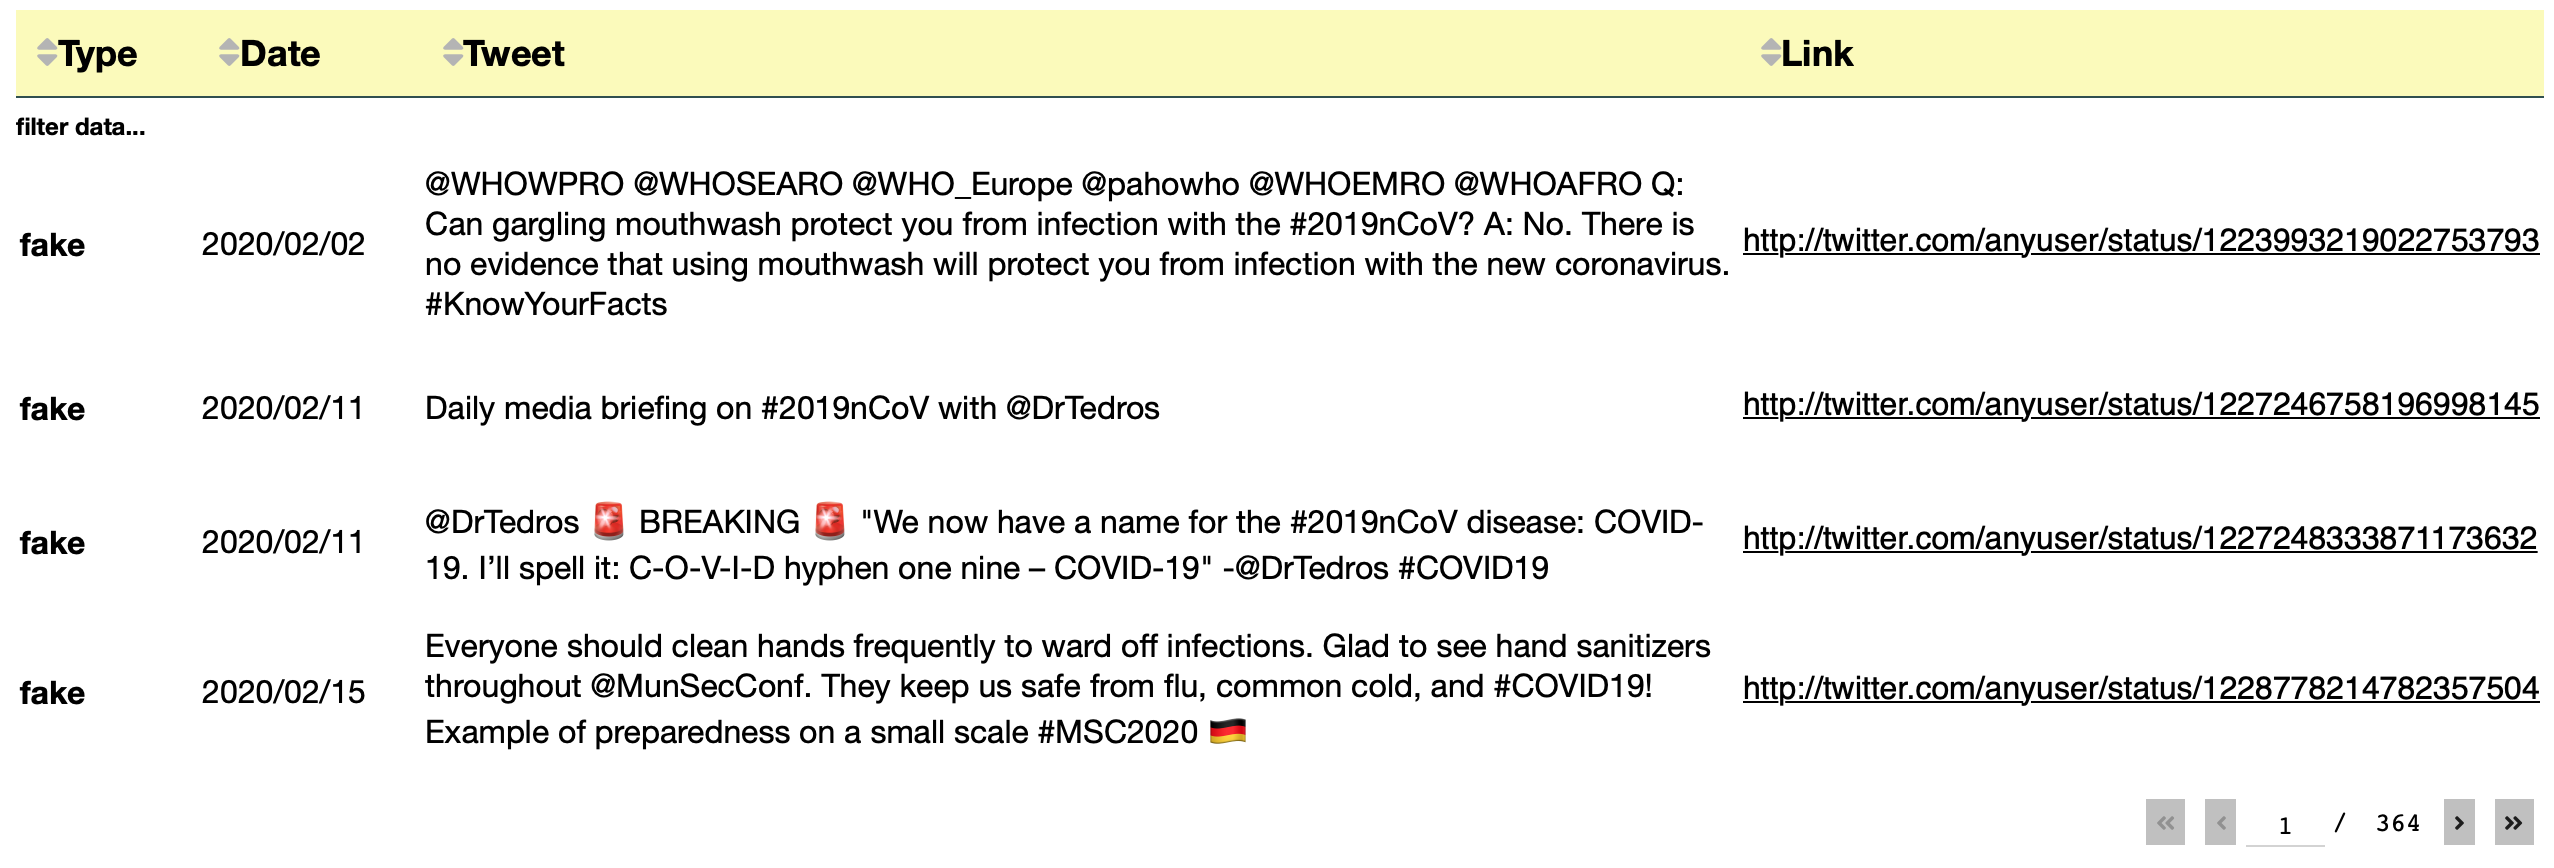

For the "filter data" field, unlike the other table cells, the style was applied using a ***CSS file***:

```
.dash-table-container .dash-spreadsheet-container .dash-spreadsheet-inner input:not([type=radio]):not([type=checkbox]){
    color: black!important;
    text-align: left!important;
    font-family: 'Helvetica Neue'!important;
    font-size: 16px!important;
    padding: 20px!important;
    font-weight: bold!important;
}

a {
    color:black!important;
}
```

## Tweets Insider Links Visualization

### Let's create the Dash DataTable...but first

The generated URLs dataset (urls.csv) (see PreProcessing notebook to get more information about its creation process) contained links that referred to:
- private Tweets, so not publicly visible and considered not relevant
- Tweets of suspended accounts, so no longer available
- deleted Tweets
- web pages no longer available

Thus, we have manually cleaned the dataset by veryfing every single link and by removing those rows that contained these irrilevant links.

### Now we can start

First, we have to read the CSV file:

In [ ]:
df = pd.read_csv('dataset/urls.csv',sep=';')

Then, we create the Dash DataTable:

In [ ]:
app = JupyterDash(__name__)
#https://dash.plotly.com/datatable/filtering
app.layout = html.Div([
    dash_table.DataTable(
        id='datatable-interactivity',
        columns=[{'name': 'Type', 'id':'Type'},
            {'name': 'Link', 'id':'Link', 'type': 'text', 'presentation':'markdown'},
            {'name': 'First-Shared', 'id': 'First-Shared'}],
        data=df.to_dict('records'),
        style_data_conditional=[{
            'if': {
                'column_id': 'Type',
            },
            'font-weight':'bold',
            'width':'200px',
        }],
        style_filter={
            "backgroundColor":"white"
        },
        style_cell={
            'textAlign':'left',
            'font-family': 'Helvetica Neue',
            'border':'0px solid darkslategray',
            'font-size':'16px',
        },
        style_header={
            'backgroundColor':"#FBFBB8", #moccasin
            'font-family':'Helvetica Neue',
            'font-weight': 'bold',
            'border-bottom':'1px solid darkslategray',
            'font-size':'17px',
            'textAlign':'left',
            'padding':'5px'
            
        },
        filter_action="native",
        sort_action="native",
        sort_mode="multi",
        page_action="native",
        page_current= 0,
        page_size= 4,
    ),
    html.Div(id='datatable-interactivity-container')
])



app.run_server(port=8051)

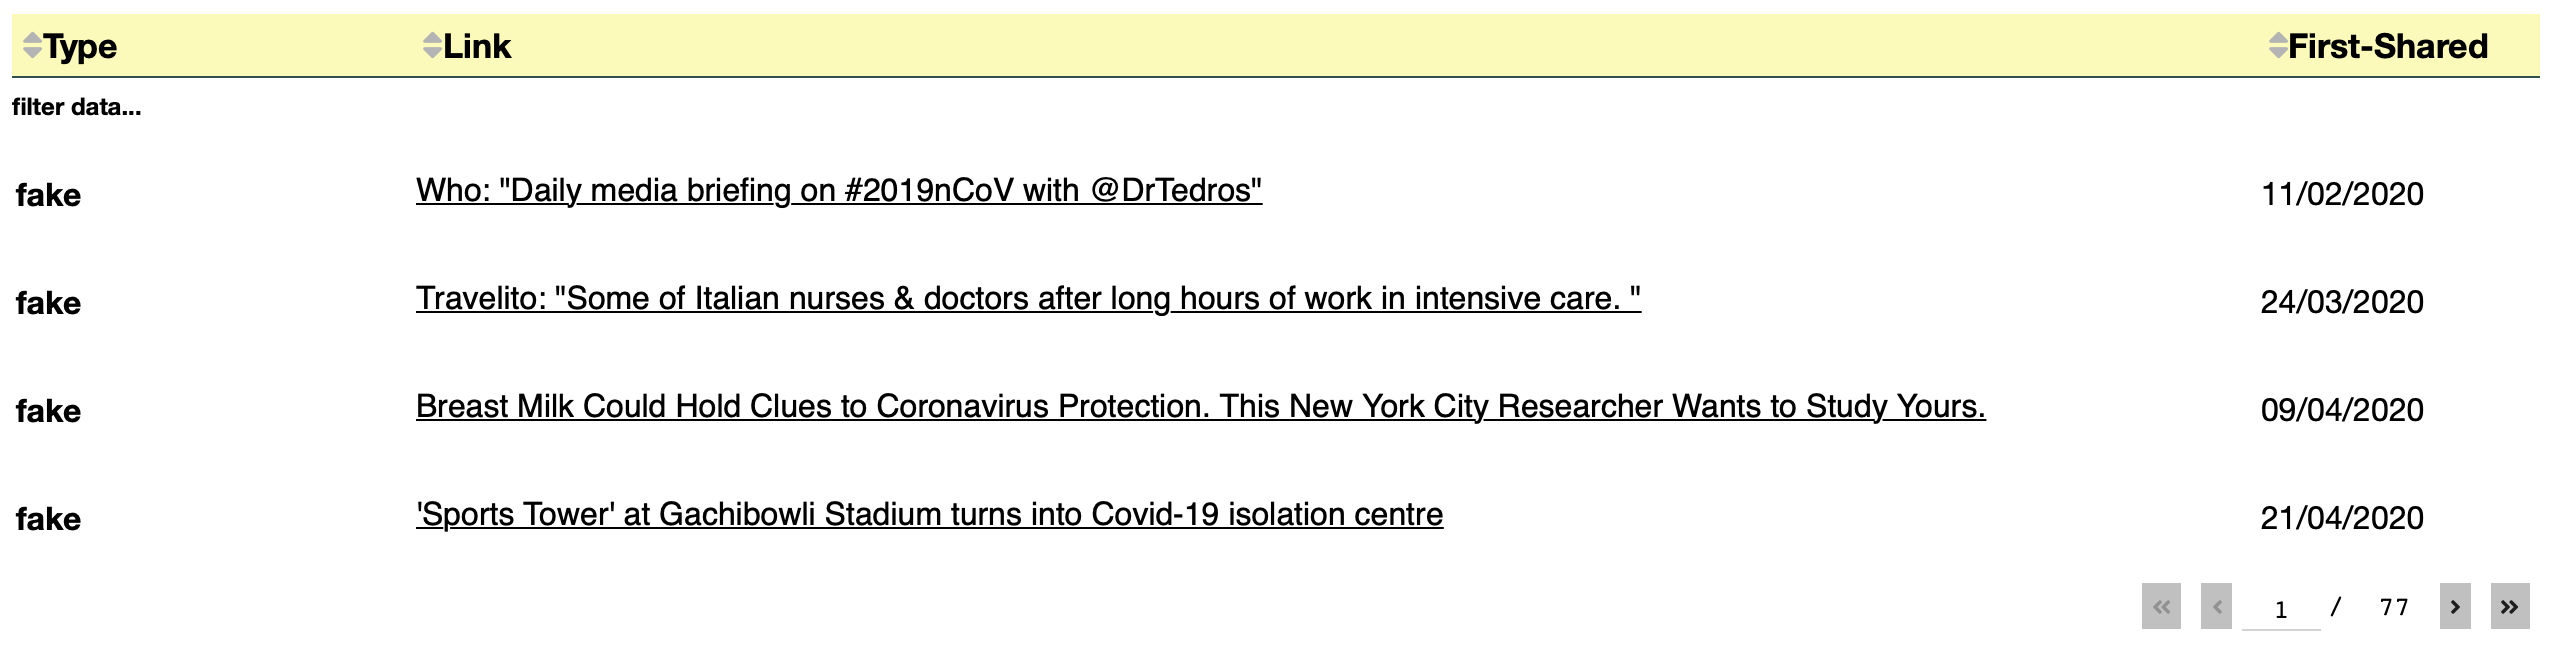

## What about the domains?

In [ ]:
index=0
domains = []
for element in data:
    #print(index)
    if data[index]['entities']['urls'] is not None:
        for entity in data[index]['entities']['urls']:
            domain = urlparse(entity['expanded_url'].lower()).netloc
            if domain!="twitter.com":
                domains.append("["+domain+"]"+"(http://"+domain+")") #wrap with http:// needed to make the link work
    
    #print(" ")
    index=index+1

count = Counter(domains)
df_d = pd.DataFrame.from_dict(count, orient='index').reset_index()
df_d = df_d.rename(columns={'index':'Domain', 0:'Count'})
df_d = df_d.sort_values(by=['Count'], ascending=False)
df.to_csv('dataset/domains_fake.csv', sep=';', index=False) #for a deeper analysis

In [ ]:
app = JupyterDash(__name__)
#https://dash.plotly.com/datatable/filtering
app.layout = html.Div([
    dash_table.DataTable(
        id='datatable-domain',
        columns=[
            {'name': 'Domain', 'id':'Domain', 'type': 'text', 'presentation':'markdown'},
            {'name': 'Count', 'id': 'Count'}],
        data=df_d.to_dict('records'),
        style_data_conditional=[{
            'if': {
                'column_id': 'Count',
            },
            'text-align':'right',
            'width':'120px'
        },
        {
            'if': {
                'column_id': 'Domain',
            },
            'text-align':'left',
            'width':'180px'
        }],
        style_header_conditional=[{
            'if': {
                'column_id': 'Count',
            },
            'text-align':'right',
            'width':'120px'
        },
        {
            'if': {
                'column_id': 'Domain',
            },
            'text-align':'left',
            'width':'180px'
        }],
        style_filter={
            "backgroundColor":"white"
        },
        style_cell={
            'font-family': 'Helvetica Neue',
            'border':'0px solid darkslategray',
            'font-size':'16px',
        },
        style_header={
            'backgroundColor':"#FBFBB8", #moccasin
            'font-family':'Helvetica Neue',
            'font-weight': 'bold',
            'border-bottom':'1px solid darkslategray',
            'font-size':'18px',
            'padding':'5px'
        },
        filter_action="native",
        sort_action="native",
        sort_mode="multi",
        page_action="native",
        page_current= 0,
        page_size= 8,
        fill_width=False
    ),
    html.Div(id='datatable-domain-container')
])

app.run_server(mode="inline",port=7773)

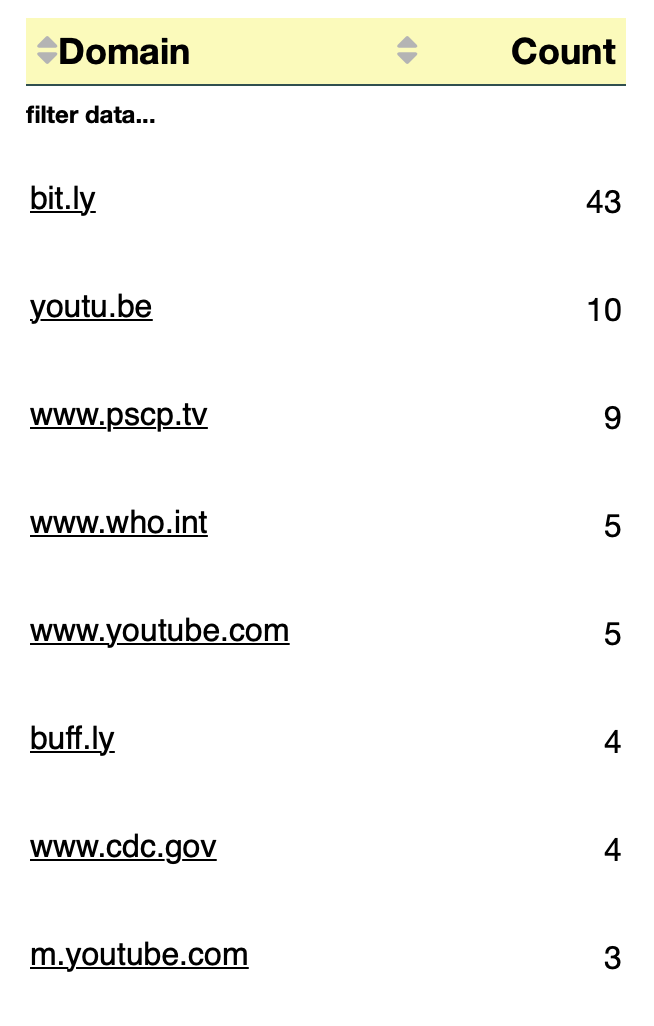